<a href="https://colab.research.google.com/github/vivekraj9/Emotion-Detection/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1importing required libraries
import pandas as pd                         #pandas are used for reading, writing and manipulating the data using tables
import numpy as np                          #numpy are used for linear algebra computation using arrays
import tensorflow as tf
from keras.models import Sequential           #to create the sequential layer

from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize

from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.optimizers import SGD, Adam            #optimizer
from keras.utils import np_utils



In [ ]:
#2connecting the notebook with the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#3Uploading dataset
print('Upload the CSV file')
#uploaded = files.upload()
#from zipfile import ZipFile

#emotion_data="/content/drive/MyDrive/Colab Notebooks/archive.zip"
#with ZipFile(emotion_data, 'r') as zip:
 # zip.extractall()
 # print("Done")
#print(emotion_data)
#print('Upload the CSV file')
#uploaded = files.upload()
emotion_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fer2013.csv.zip')
print(emotion_data)
print('Dataset Uploaded')

Upload the CSV file
       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]
Datase

In [ ]:
X_train = []          #train pixels, empty lists, contains the training set input data
y_train = []          #train labels, contain the corresponding training set labels
X_test = []           #test pixels, contain the testing set input data
y_test = []           #test label, contain the corresponding testing set labels
for index, row in emotion_data.iterrows():          #iterate on each row and store it
    k = row['pixels'].split(" ")                    #list of pixels, each pixel is an element and splits them into a list
    try:
      if row['Usage'] == 'Training':
          X_train.append(np.array(k,'float32'))       #The desired data-type for the array is
          y_train.append(row['emotion'])
      elif row['Usage'] == 'PublicTest':
          X_test.append(np.array(k,'float32'))
          y_test.append(row['emotion'])
    except:
      print(f"error occured at index :{index} and row:{row}")




print(X_test)
print(type(X_test))


print(y_train)
print(type(y_train))

[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32), array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32), array([205., 203., 236., ...,  43.,  82.,  86.], dtype=float32), array([87., 79., 74., ..., 41., 34., 32.], dtype=float32), array([235., 233., 223., ...,  33.,  17.,  19.], dtype=float32), array([ 71.,  70., 104., ..., 127., 105., 108.], dtype=float32), array([176., 177., 170., ..., 130., 144., 141.], dtype=float32), array([255., 255., 255., ..., 255., 255., 255.], dtype=float32), array([126., 126., 123., ..., 130.,  97.,  78.], dtype=float32), array([180., 175., 169., ...,  32.,  32.,  33.], dtype=float32), array([ 88.,  46.,  35., ..., 229., 228., 227.], dtype=float32), array([121., 112.,  64., ...,  81.,  83.,  85.], dtype=float32), array([165., 203., 211., ..., 189., 178., 167.], dtype=float32), array([22., 28., 27., ..., 90., 81., 92.], dtype=float32), array([132., 154., 165., ...,  70., 

In [ ]:
#Convert Lists to Numpy arrays of the datatype float32
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

#Reshape Pixels arrays
#normalizing data between o and 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

#reshape the numpy array to be passed to the model
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

print(X_test.shape)
print(type(X_test))
print(X_train.shape)

#Convert Labels array to categorial ones
#y_train= tf.keras.utils.to_categorical(y_train, num_classes=7)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

y_train= np_utils.to_categorical(y_train, num_classes=7)        #converts arrays into one hot encoded categorical variables
y_test = np_utils.to_categorical(y_test, num_classes=7)
print(y_train)
print(y_train.shape)
print(type(y_train))

(3589, 48, 48, 1)
<class 'numpy.ndarray'>
(28709, 48, 48, 1)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(28709, 7)
<class 'numpy.ndarray'>


In [ ]:
model = Sequential()        #creates sequeential model, layers can be added one by one

model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())                        #Converts the 2D feature maps to a 1D vector
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.summary()       #'None' is the batch size which can vary depending on the number of samples being processed at once

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch = 32
epoch = 30

history = model.fit(X_train,y_train,batch_size= batch,epochs= epoch,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/30
898/898 [==============================] - 56s 49ms/step - loss: 1.7527 - accuracy: 0.2812 - val_loss: 1.5342 - val_accuracy: 0.3853
Epoch 2/30
898/898 [==============================] - 40s 44ms/step - loss: 1.4572 - accuracy: 0.4167 - val_loss: 1.3797 - val_accuracy: 0.4542
Epoch 3/30
898/898 [==============================] - 41s 46ms/step - loss: 1.3205 - accuracy: 0.4756 - val_loss: 1.2728 - val_accuracy: 0.5004
Epoch 4/30
898/898 [==============================] - 42s 47ms/step - loss: 1.2068 - accuracy: 0.5288 - val_loss: 1.2251 - val_accuracy: 0.5300
Epoch 5/30
898/898 [==============================] - 42s 47ms/step - loss: 1.0999 - accuracy: 0.5732 - val_loss: 1.1927 - val_accuracy: 0.5511
Epoch 6/30
898/898 [==============================] - 41s 46ms/step - loss: 0.9960 - accuracy: 0.6195 - val_loss: 1.1640 - val_accuracy: 0.5729
Epoch 7/30
898/898 [==============================] - 42s 47ms/step - loss: 0.8814 - accuracy: 0.6668 - val_loss: 1.1871 - val_accuracy:

In [ ]:
loss_and_metrics = model.evaluate(X_test,y_test)
print(loss_and_metrics)

113/113 [==============================] - 2s 13ms/step - loss: 2.4185 - accuracy: 0.5996
[2.4184677600860596, 0.599609911441803]


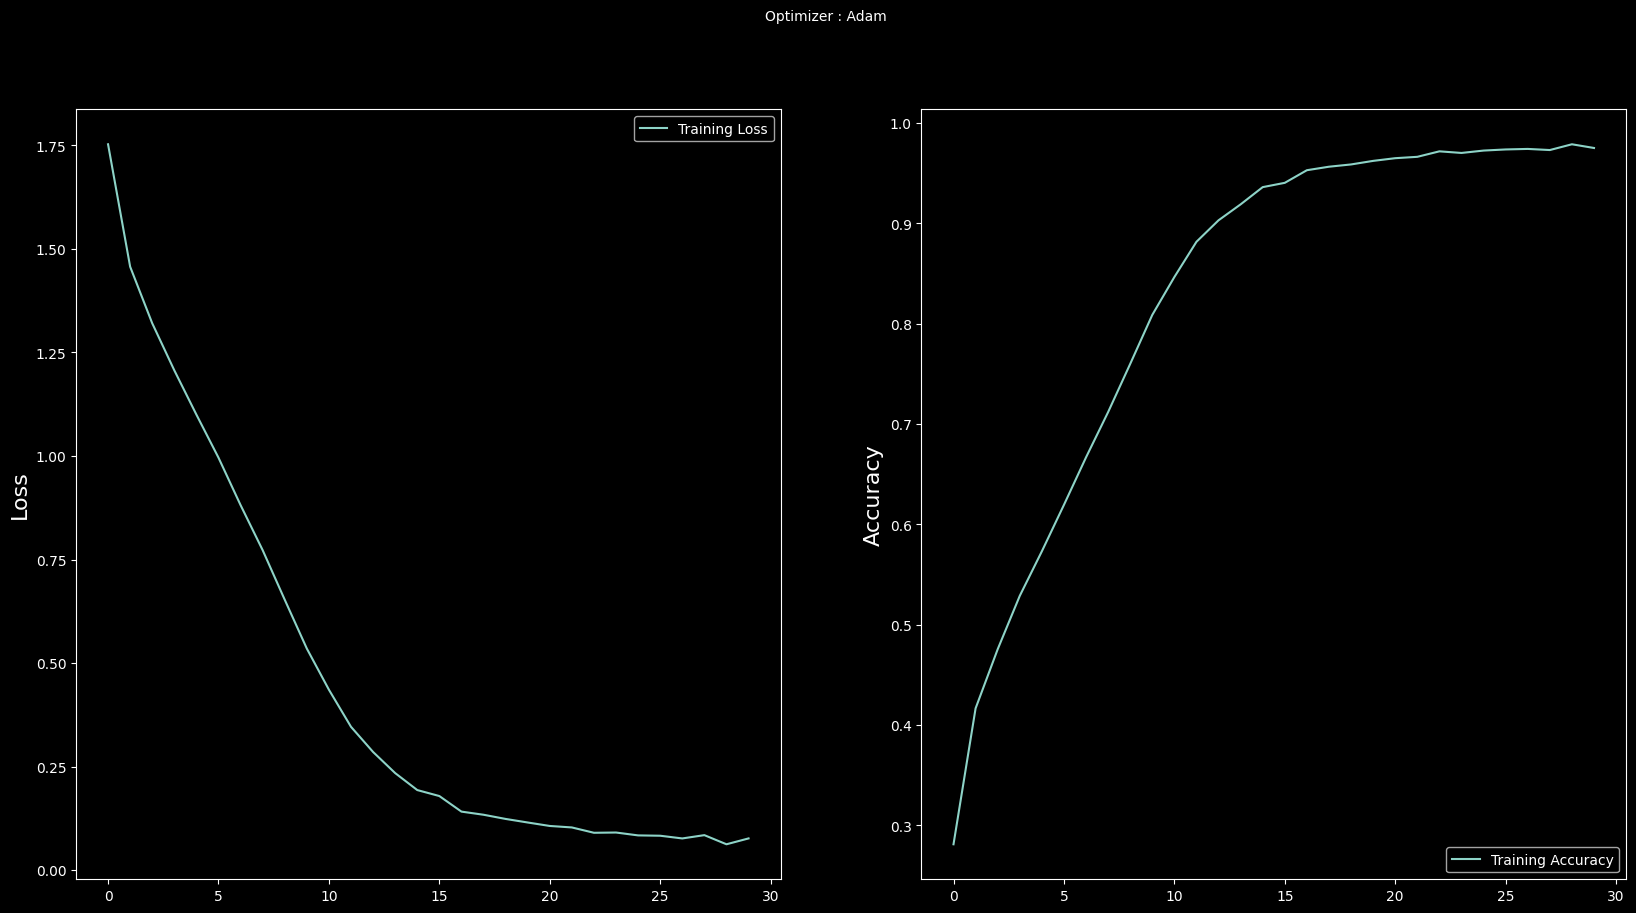

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")